In [3]:
!pip install numpy==1.26.4 scikit-learn==1.3.2 scipy==1.11.4 joblib==1.2.0 pillow==9.5.0 streamlit==1.26.0 --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/1

In [24]:
import numpy as np
import sklearn
import scipy
import joblib
import PIL
import streamlit as st

print("NumPy:", np.__version__)
print("Scikit-learn:", sklearn.__version__)
print("SciPy:", scipy.__version__)
print("Joblib:", joblib.__version__)
print("Pillow:", PIL.__version__)
print("Streamlit:", st.__version__)


NumPy: 1.26.4
Scikit-learn: 1.3.2
SciPy: 1.11.4
Joblib: 1.2.0
Pillow: 9.5.0
Streamlit: 1.26.0


In [25]:
!python --version

Python 3.11.13


In [26]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
df = pd.read_csv("dataset_nanas.csv")
print(df.head())

            File            Label    R    G    B
0  img_1891.jpeg  setengah_matang  110  108  108
1  img_2381.jpeg  setengah_matang  203  192  169
2  img_3661.jpeg  setengah_matang  203  192  169
3  img_2211.jpeg  setengah_matang  196  193  165
4  img_2581.jpeg  setengah_matang  107  103   58


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   File    230 non-null    object
 1   Label   230 non-null    object
 2   R       230 non-null    int64 
 3   G       230 non-null    int64 
 4   B       230 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 9.1+ KB


In [29]:
df.describe()

,R,G,B
count,230.000000,230.000000,230.000000
mean,162.369565,155.991304,123.952174
std,49.669369,44.998786,52.735083
min,34.000000,27.000000,16.000000
25%,123.250000,120.000000,81.250000
50%,160.500000,155.000000,117.000000
75%,206.750000,192.000000,168.000000
max,244.000000,244.000000,227.000000


# Preprocessing Data

In [30]:
#Cek data kosong
print(df.isnull().sum())

File     0
Label    0
R        0
G        0
B        0
dtype: int64


In [31]:
# Cek data duplikat
print(df.duplicated().sum())

0


# Visualisasi Data

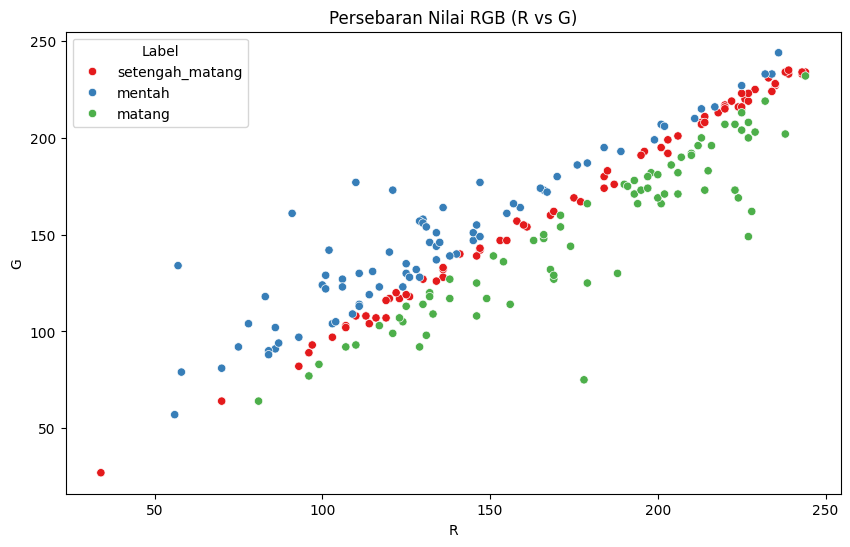

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='R', y='G', hue='Label', palette='Set1')
plt.title('Persebaran Nilai RGB (R vs G)')
plt.show()

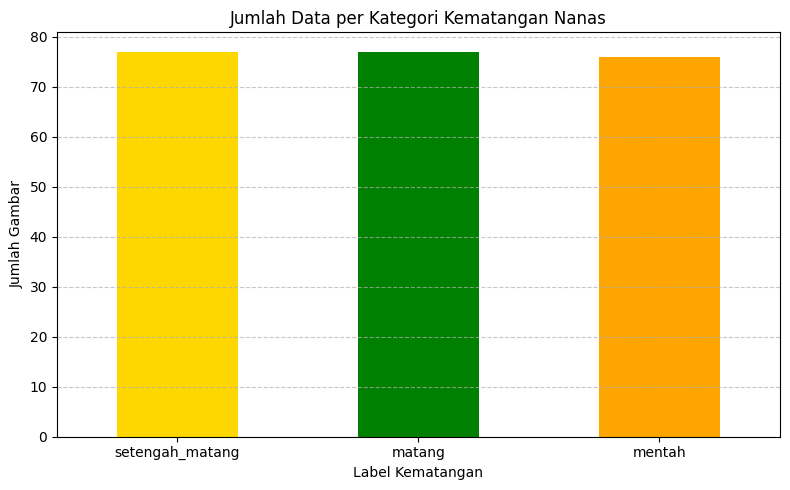

In [33]:
# Hitung jumlah data per label
label_counts = df['Label'].value_counts()

# Buat diagram batang
plt.figure(figsize=(8,5))
label_counts.plot(kind='bar', color=['gold', 'green', 'orange'])
plt.title('Jumlah Data per Kategori Kematangan Nanas')
plt.xlabel('Label Kematangan')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pisahkan Fitur (RGB) dan Label (Kematangan)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import joblib

X = df[['R', 'G', 'B']]
y = df['Label']

# Normalisasi

In [35]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data untuk Training/Testing

In [36]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, stratify=y, random_state=42)

#  Evaluasi Model

In [37]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [38]:
# Prediksi
y_pred = knn.predict(X_test)

In [39]:
# Hasil Model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Akurasi: 0.7608695652173914

Classification Report:
                  precision    recall  f1-score   support

         matang       0.88      0.88      0.88        16
         mentah       0.90      0.60      0.72        15
setengah_matang       0.60      0.80      0.69        15

       accuracy                           0.76        46
      macro avg       0.79      0.76      0.76        46
   weighted avg       0.79      0.76      0.76        46


Confusion Matrix:
 [[14  0  2]
 [ 0  9  6]
 [ 2  1 12]]


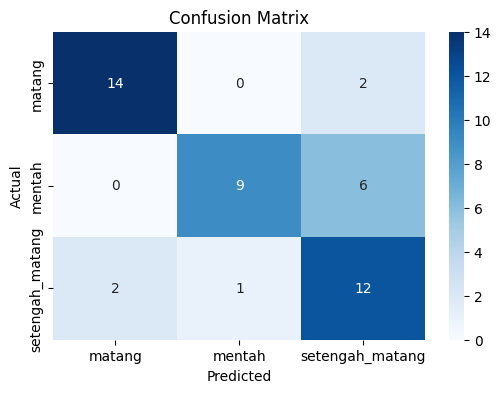

In [40]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f'k={k} → Accuracy: {acc:.2f}')

k=1 → Accuracy: 0.65
k=2 → Accuracy: 0.63
k=3 → Accuracy: 0.65
k=4 → Accuracy: 0.67
k=5 → Accuracy: 0.67
k=6 → Accuracy: 0.67
k=7 → Accuracy: 0.67
k=8 → Accuracy: 0.70
k=9 → Accuracy: 0.72
k=10 → Accuracy: 0.76


In [42]:
import joblib
joblib.dump(knn, 'model_knn.pkl')
joblib.dump(scaler, 'scaler_knn.pkl')

['scaler_knn.pkl']

In [43]:
# 10. Prediksi data uji manual
# Contoh RGB yang ingin diprediksi
sample_rgb = [[235, 227, 196]]  # Ganti dengan nilai RGB lain

# Normalisasi dulu seperti data training
sample_scaled = scaler.transform(sample_rgb)

# Prediksi
predicted_label = knn.predict(sample_scaled)

print("🔮 Prediksi label untuk RGB", sample_rgb, "adalah:", predicted_label[0])

🔮 Prediksi label untuk RGB [[235, 227, 196]] adalah: setengah_matang


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
